In [1]:
# Imports
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# Number of optimizations/versions
num_o = 18

# Create dataframe for all data
data_all = pd.DataFrame()

# Loop over all versions
for version in range(0, num_o):
    
    # Parse data
    directory = "version_{}".format(version)
    path = "./{}/bench/stats.csv".format(directory)
    data = pd.read_csv(path, skipinitialspace = True)
    
    # Add version column
    data["version"] = version
    
    # Select columns
    data = data.loc[:, ["version", "event", "occurrences"]]
    
    # Add current data to all data
    data_all = pd.concat([data_all, data], ignore_index = True)

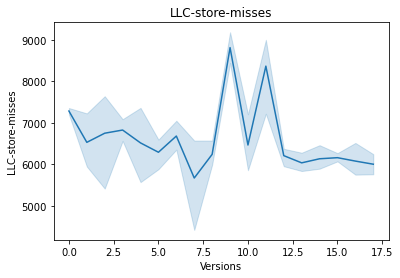

In [8]:
# stats.csv events for reference:
# cycles, instructions, branch-misses, LLC-load-misses, LLC-store-misses, duration_time

event = "LLC-store-misses"

# Create lineplot
g = sns.lineplot(
    x = "version",
    y = "occurrences",
    data=data_all[data_all.event == event])

# Set labels and title
g.set(
    title=event,
    xlabel="Versions",
    ylabel=event)

plt.savefig("./plots/{}".format(event))